<a href="https://colab.research.google.com/github/jf-gonzalez/proyectos_hechos/blob/main/Analisis_de_correlacion_Energetika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis de correlaciones

In [110]:
#Librerias utilizadas
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount ("/content/drive")

Mounted at /content/drive


In [64]:
conjunto_central = pd.read_csv("/content/drive/MyDrive/Data CodingDojo/Prueba Seleccion/Central Media Temperatura.csv",encoding='latin-1', header=3)
conjunto_energia = pd.read_csv("/content/drive/MyDrive/Data CodingDojo/Prueba Seleccion/Energia y Potencia Central Media Temperatura.csv",encoding='latin-1',header=1)

In [70]:
print(f"registros: {conjunto_central.shape[0]}, columnas: {conjunto_central.shape[1]}")
print(f"registros: {conjunto_energia.shape[0]}, columnas: {conjunto_energia.shape[1]}")

registros: 2300, columnas: 6
registros: 2304, columnas: 3


### Conversion de columna **Time** y **Date** a **datetime** para su procesamiento como timestamp

In [ ]:
conjunto_central["datetime"] = conjunto_central["Date"] +" " +conjunto_central["Time"]
conjunto_central["datetime"] = pd.to_datetime(conjunto_central["datetime"])
conjunto_central.drop(columns=["Time","Date"], inplace = True)

### Conversion de columna **Time stamp** a **datetime** para su procesamiento como timestamp

In [ ]:
conjunto_energia["datetime"] = pd.to_datetime(conjunto_energia["Time stamp"])
conjunto_energia.drop(columns="Time stamp", inplace= True)

### Union de ambos conjuntos de datos para ver su correlacion respecto a la energia/potencia dada

In [104]:
conjunto_final = pd.merge(conjunto_central,conjunto_energia, how="inner", on="datetime")

In [113]:
conjunto_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1424 entries, 0 to 1423
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   A_r24 Po ref. {°C}      1424 non-null   float64       
 1   A_r29 Pc ref. {°C}      1424 non-null   float64       
 2   A_Po_temp {°C}          1424 non-null   float64       
 3   A_Pc_temp {°C}          1424 non-null   float64       
 4   datetime                1424 non-null   datetime64[ns]
 5   Consumo EnergÃ­a (kWh)  1424 non-null   float64       
 6   Potencia (kW)           1424 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 89.0 KB


Se hace un inner join, en python, para asegurarnos que no existan valores nulos de por medio con respecto a la columna datetime creada

In [ ]:
correlacion = conjunto_final.corr()

<Axes: >

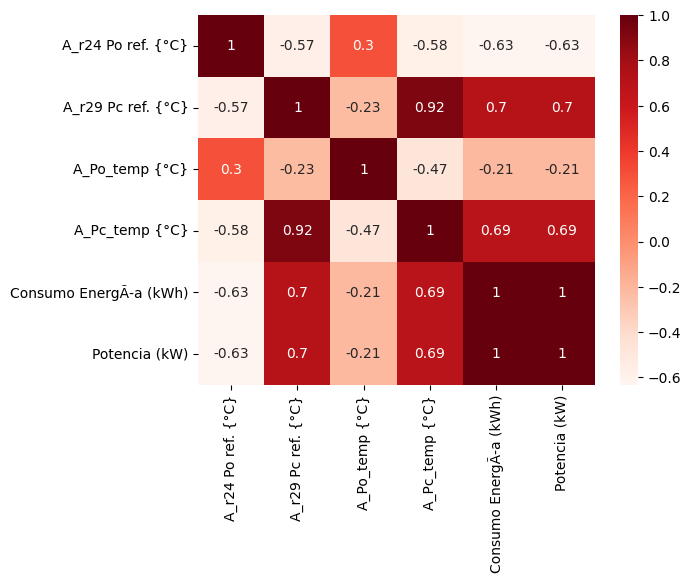

In [112]:
grafico = sns.heatmap(correlacion, annot=True, cmap='Reds')
grafico

### Las correlaciones varian entre 0 a 1 si son positivas  o 0 a -1 si son negativas.

En general, una correlación más grande que 0,7 se considera “fuerte”.

Entre 0,5 y 0,7 se considera “moderado”.

Entre 0,3 y 0,5 se considera una correlación “baja”.

**A grandes rasgos**


* las variables A_Pc_temp y A_r29 tienen una correlacion positiva fuerte con el consumo y potencia.
* la variable A_r24 tiene una correlacion negativa moderada con las variables de consumo y potencia.

estas correlaciones tambien fueron percibidas en grafico hecho en PowerBI durante las 9:00 y las 21:00 horas.

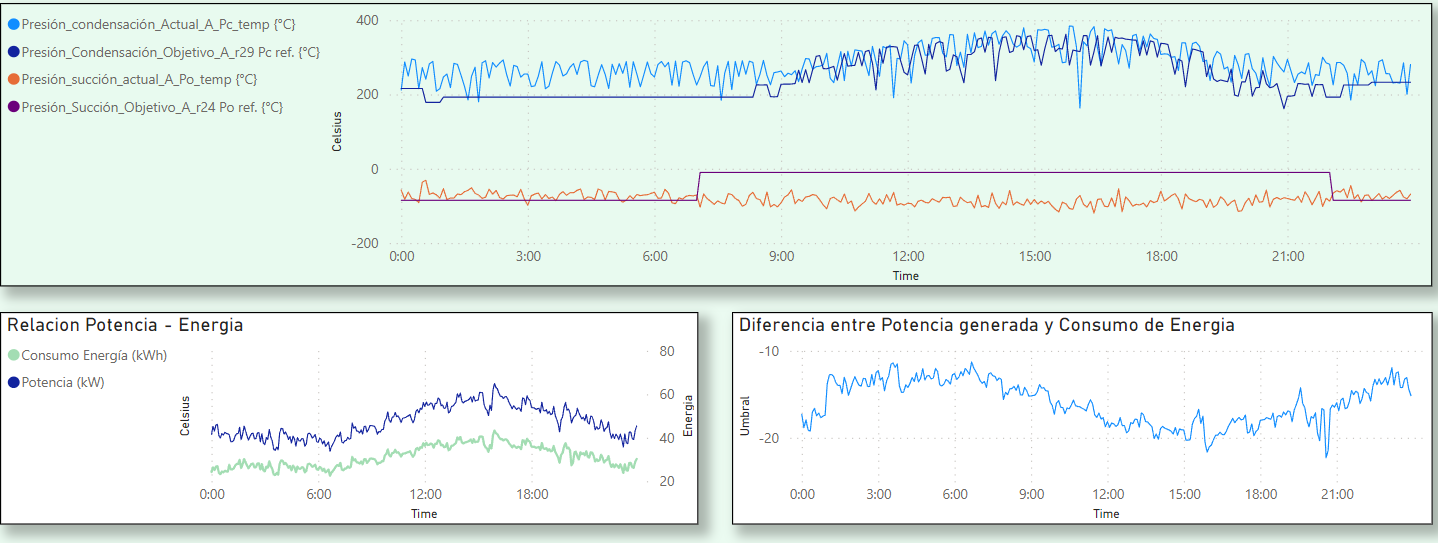